In [3]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [6]:
import os

os.getcwd()

'c:\\Users\\sleem\\Desktop\\AWS_ML_AI\\Matplotlib'

In [16]:
pokemon = pd.read_csv('Matplotlib_practice\data\pokemon.csv')
print(pokemon.shape)
pokemon.head(n = 7)


(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64


#### ___Bar Chart Using Seaborn___

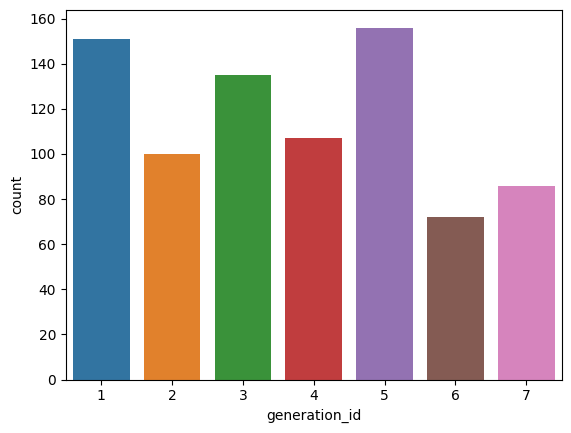

In [12]:
# A semicolon (;) at the end of the statement will supress printing the plotting information
sb.countplot(data=pokemon, x='generation_id');

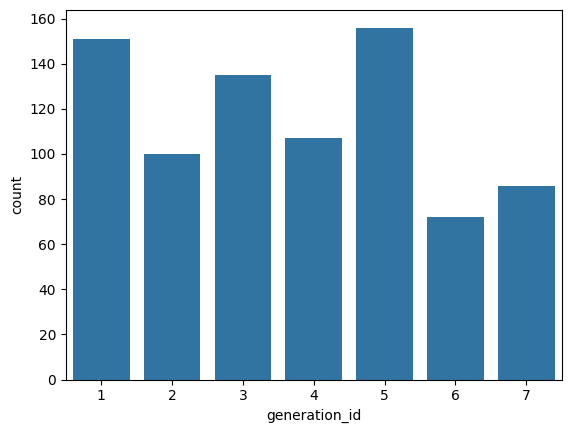

In [15]:
# The `color_palette()` returns the the current / default palette as a list of RGB tuples. 
# Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. 
# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]

# Use the `color` argument
sb.countplot(data=pokemon, x='generation_id', color=base_color);


##### ___Odering of the Bars Using `seaborn.countplot()`___

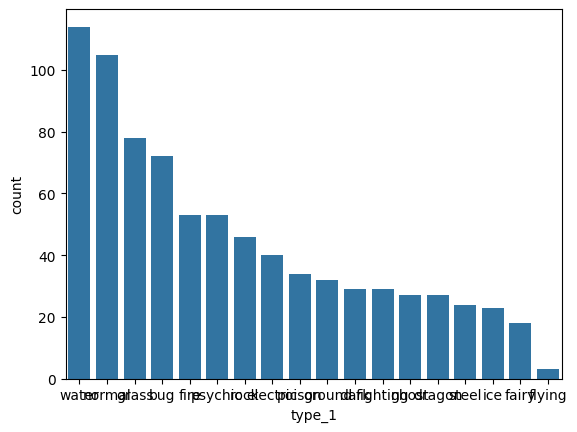

In [28]:
freq =  pokemon['type_1'].value_counts()  ## Obtain the frequency of each pokemon type
type_order = freq.index #stores the index or position of each pokemon type as a series


# The `color_palette()` returns the the current / default palette as a list of RGB tuples. 
# Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. 
# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]

# Plot the bar chart in the decreasing order of the frequency of the `pokemon type`
sb.countplot(data=pokemon, x='type_1', color=base_color, order=type_order);



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'water'),
  Text(1, 0, 'normal'),
  Text(2, 0, 'grass'),
  Text(3, 0, 'bug'),
  Text(4, 0, 'fire'),
  Text(5, 0, 'psychic'),
  Text(6, 0, 'rock'),
  Text(7, 0, 'electric'),
  Text(8, 0, 'poison'),
  Text(9, 0, 'ground'),
  Text(10, 0, 'dark'),
  Text(11, 0, 'fighting'),
  Text(12, 0, 'ghost'),
  Text(13, 0, 'dragon'),
  Text(14, 0, 'steel'),
  Text(15, 0, 'ice'),
  Text(16, 0, 'fairy'),
  Text(17, 0, 'flying')])

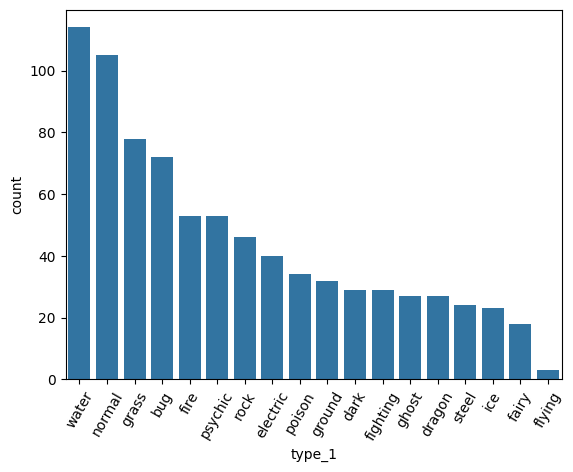

In [35]:
#### The labelling looks messy... We rotate the label
# Plot the bar chart in the decreasing order of the frequency of the `pokemon type`
sb.countplot(data=pokemon, x='type_1', color=base_color, order=type_order);

plt.xticks(rotation = 60)  #Use rotation angle that fits your need

#### ___Bar Chart USing Matplotlib, with a Uniform Single Color___

int64


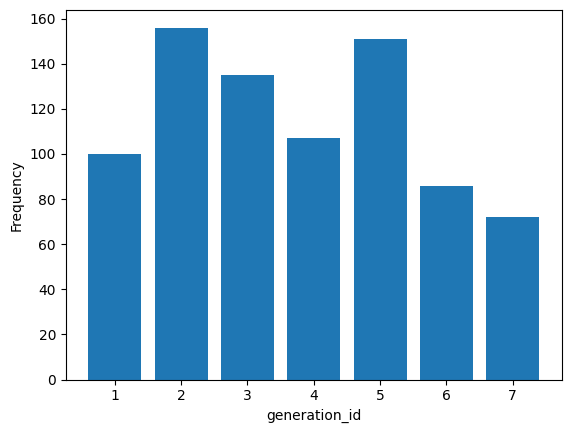

In [92]:
# Return the Series having unique values
x = pokemon['generation_id'].value_counts().index    ### OR pokemon['generation_id'].unique()

print(x.dtype)

# Return the Series having frequency count of each unique value
y = pokemon['generation_id'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('Frequency')

# Dsiplay the plot
plt.show()

#### ___Barchart for a Categorical String Data Type Using Matplotlib___

poison      32
flying      95
ground      32
fairy       29
grass       19
fighting    25
psychic     29
steel       23
ice         11
rock        14
water       17
electric     8
fire        11
dragon      18
dark        17
ghost       16
bug          5
normal       4
Name: type_2, dtype: int64


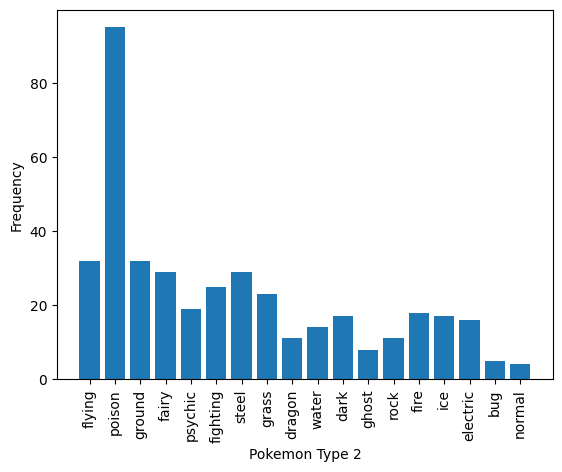

In [94]:
# Return the Series having unique values
x = pokemon['type_2'].value_counts().index

# Return the Series having frequency count of each unique value
y = pokemon['type_2'].value_counts(sort=False)
print(y)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('Pokemon Type 2')
plt.ylabel('Frequency')

## rotating the x-axis label.

plt.xticks(rotation = 90)

# Dsiplay the plot
plt.show()



### ___Demonstrate data wrangling, and plot a horizontal bar chart.___

#### ___Data Wrangling___

`pandas.DataFrame.melt(id_vars, value_vars, var_name, value_name, col_level, ignore_index)`



   - id_vars - It is a tuple representing the column(s) to use as identifier variables.
   - value_vars - It is tuple representing the column(s) to unpivot (remove, out of place).
   - var_name - It is a name of the new column.
   - value_name - It is a name to use for the ‘value’ of the columns that are unpivoted.


In [71]:
pkmn_types = pokemon.melt(id_vars=['id', 'species'], 
                          value_vars=['type_1', 'type_2'], 
                          var_name='type_level', 
                          value_name='type')

pkmn_types.tail()



,id,species,type_level,type
1609,803,poipole,type_2,NaN
1610,804,naganadel,type_2,dragon
1611,805,stakataka,type_2,steel
1612,806,blacephalon,type_2,ghost
1613,807,zeraora,type_2,NaN


Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')


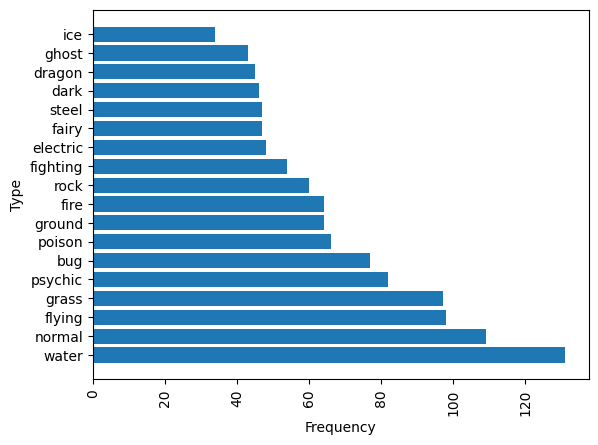

In [113]:
type_order = pkmn_types['type'].value_counts().index
print(type_order)

type_count = pkmn_types['type'].value_counts()

plt.barh(type_order,type_count)
# Labeling the axes
plt.ylabel('Type')
plt.xlabel('Frequency')

#rotation of xlabels
plt.xticks(rotation = 90)

# Dsiplay the plot
plt.show()



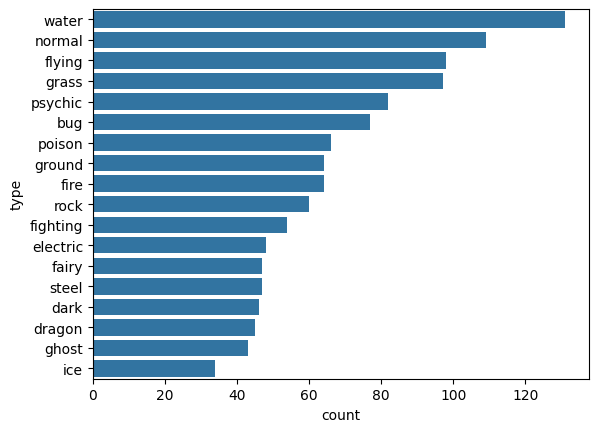

In [98]:
#### Using seaborn for the example above.

sb.countplot(data = pkmn_types, y = 'type', color = sb.color_palette()[0], order = type_order);

#### ___Bar Chart having Proportions, Instead of Actual Counts___

 ___First, find the maximum proportion of bar___

In [101]:
# Returns the sum of all not-null values in `type` column
n_pokemon = pkmn_types['type'].value_counts().sum()

# Return the highest frequency in the `type` column
max_type_count = type_count[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


___Then, create an array of evenly spaced proportioned values___

In [102]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

___Next, create a list of String values that can be used as tick labels and the plot.___

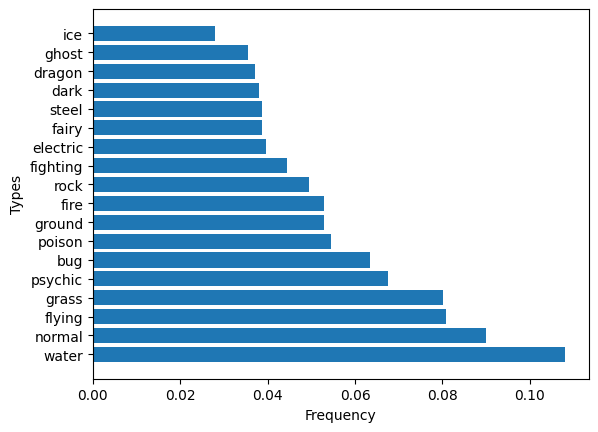

In [112]:
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

plt.barh(type_order,type_count)
# Change the tick locations 
plt.xticks(tick_props * n_pokemon, tick_names)

# Labeling the axes
plt.xlabel('Frequency')
plt.ylabel('Types')

plt.show()


### ___Print the text (proportion) on the bars of a horizontal plot.___

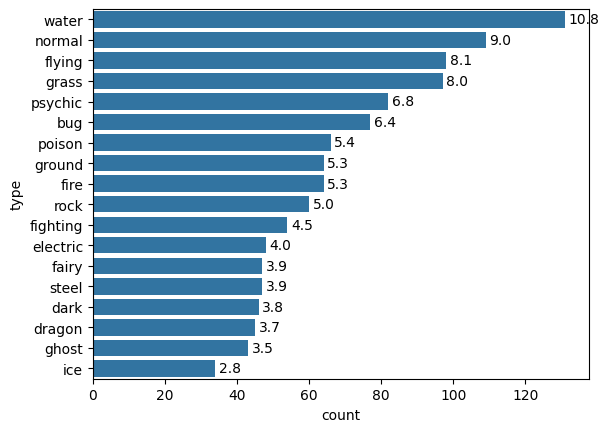

In [114]:
# Considering the same chart from the Example 1 above, print the text (proportion) on the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_count.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_count[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    # Print the string value on the bar. 
    plt.text(count+1, i, pct_string, va='center')

### ___Print the text (proportion) below the bars of a Vertical plot. Using the first example in the note___

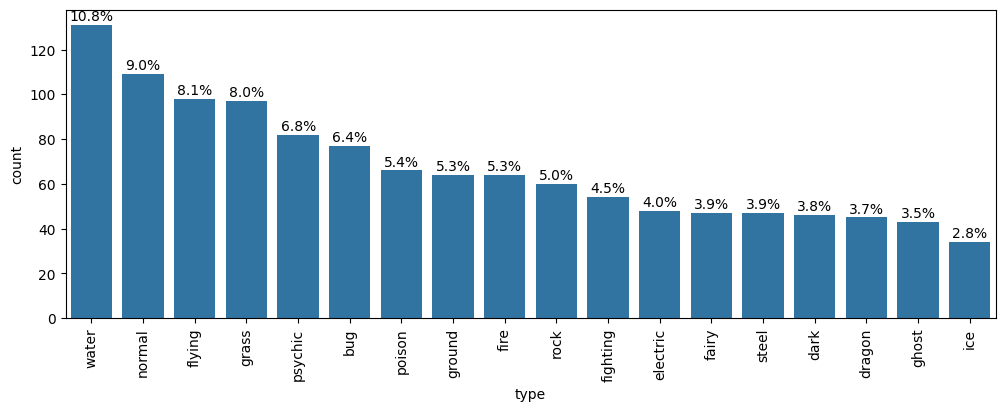

In [117]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

In [157]:
# from matplotlib import rcParams
# # Specify the figure size in inches, for both X, and Y axes
# rcParams['figure.figsize'] = 12,4

### ___Plot the Bar Chart from the NaN Table Obtained from a Dataframe, and also Print Values on Each Bar.___

In [128]:
sales_data = pd.read_csv('sales-data.csv')


## Obtain the sum of missing values in each column

sales_data.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [141]:
## Prepare a NaN tabular data 
na_counts = sales_data.drop(['Date', 'Temperature', 'Fuel_Price'], axis=1).isna().sum()
print(na_counts)

Store              0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


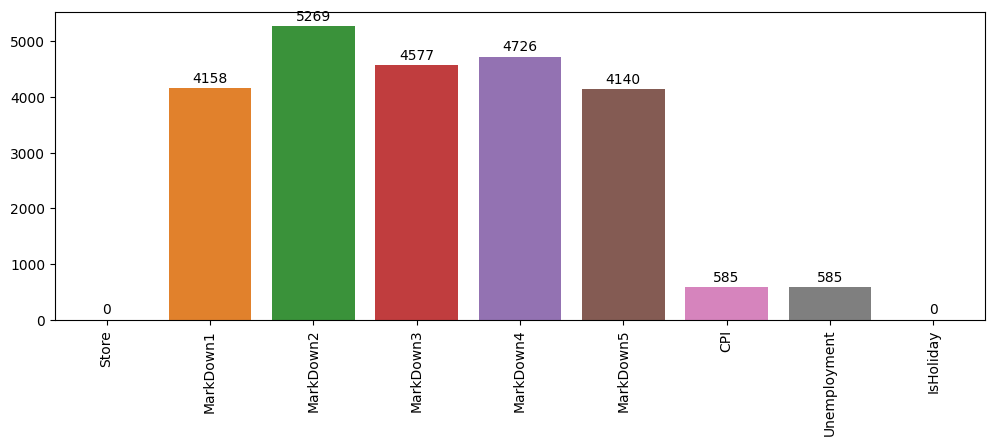

In [155]:
# The first argument to the function below contains the x-values (column names), the second argument the y-values (our counts).
# Refer to the syntax and more example here - https://seaborn.pydata.org/generated/seaborn.barplot.html
sb.barplot(x = na_counts.index, y = na_counts)



# get the current tick locations and labels
plt.xticks(rotation=90) 

# Logic to print value on each bar
for i in range (na_counts.shape[0]):
    count = na_counts[i]

    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    plt.text(i, count+300, count, ha = 'center', va='top')

### ___PIE CHART___

(-1.0999999988383489, 1.099999998489967, -1.099999997449756, 1.09999999987856)

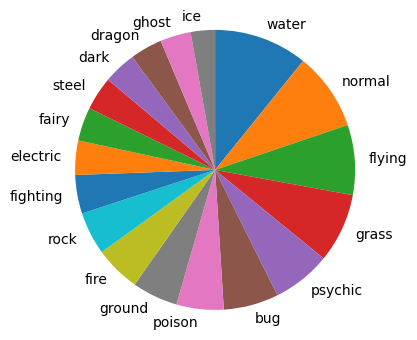

In [161]:
## Using the data from above.. Let's make a pie chart for variable type from the ppkmn_types data

type_order = pkmn_types['type'].value_counts().index

type_count = pkmn_types['type'].value_counts()

plt.pie(type_count, labels = type_order, startangle = 90, counterclock = False);

# We have the used option `Square`. 
# Though, you can use either one specified here - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axis
plt.axis('square')

___Simple Donut Plot___

(-1.0999999988383489, 1.099999998489967, -1.099999997449756, 1.09999999987856)

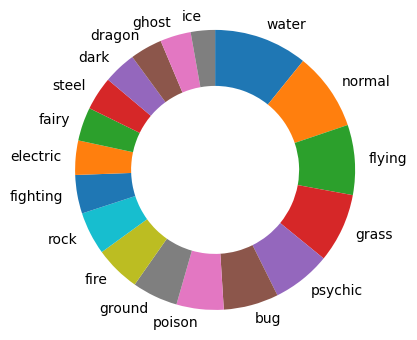

In [162]:
plt.pie(type_count, labels = type_order, startangle = 90, counterclock = False
                ,wedgeprops = {'width' : 0.4});
plt.axis('square')

### ___Histogram___

- Used to plot the distribution of a numeric variable.
- It is the quantitative version of the bar chart

In this section, the pokeman data will be used.

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <BarContainer object of 10 artists>)

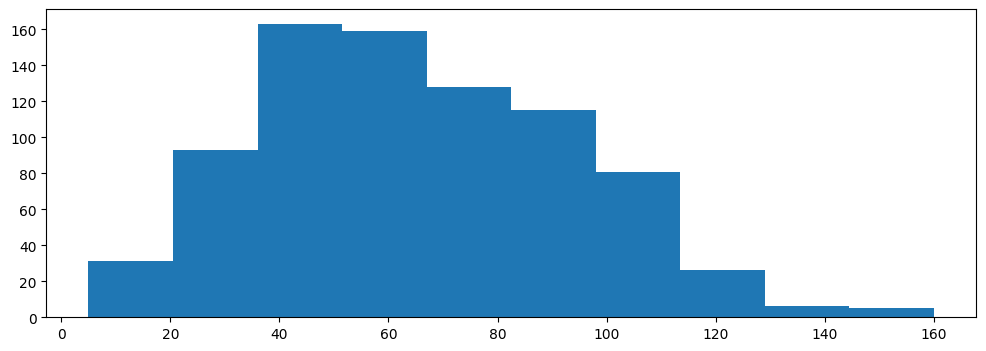

In [164]:
plt.hist(data = pokemon, x = 'speed')

## The array printed with the result represents the bar-width. 
## Include a semicolon at the end of the `plt.hist` statement to not see the array

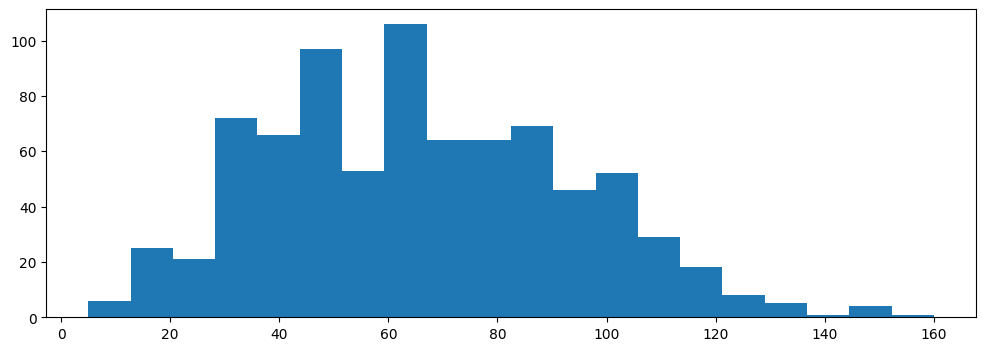

In [166]:
#### With 20 bins

plt.hist(data = pokemon, x = 'speed', bins = 20);

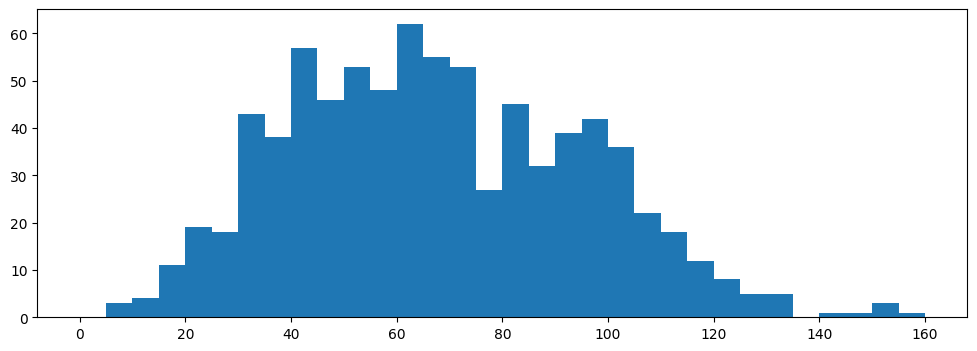

In [168]:
### Histogram with dynamic number of bins

bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins);

___Histogram with Seaborn:___

- `seaborn.displot(Series, bins, kde, hist_kws) or seaborn.displot(data, x = variable, bins, kde, hist_kws)`
- `seaborn.histplot(Series, bins, kde, hist_kws)`



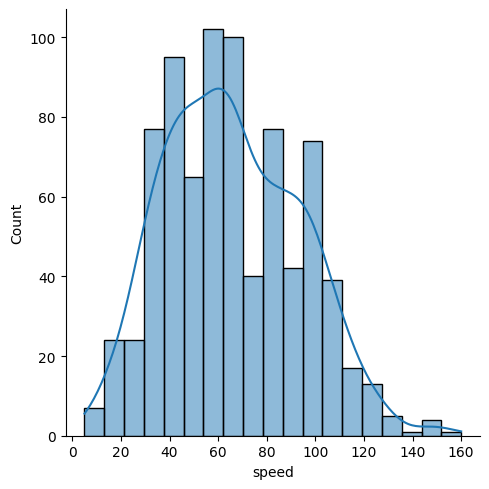

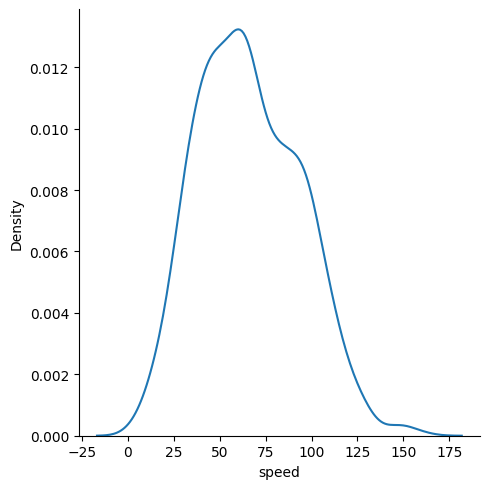

In [178]:
sb.displot(data = pokemon, x = 'speed', kde = True ) ; #prints histogram with kernel density curve
sb.displot(data = pokemon, x = 'speed', kind = 'kde'); #prints ony the kernel/normal density curve

#or
#sb.displot(pokemon['speed'], kde = True)

# Set the argument `kde=False` to remove the estimate-line representing the Gaussian kernel density estimate.
#sb.histplot(pokemon['speed'], kde=False)

In [180]:
# bin_edges = np.arange(0, df['num_var'].max()+1, 1)
# sb.distplot(df['num_var'], bins = bin_edges, kde = False,
#             hist_kws = {'alpha' : 1})

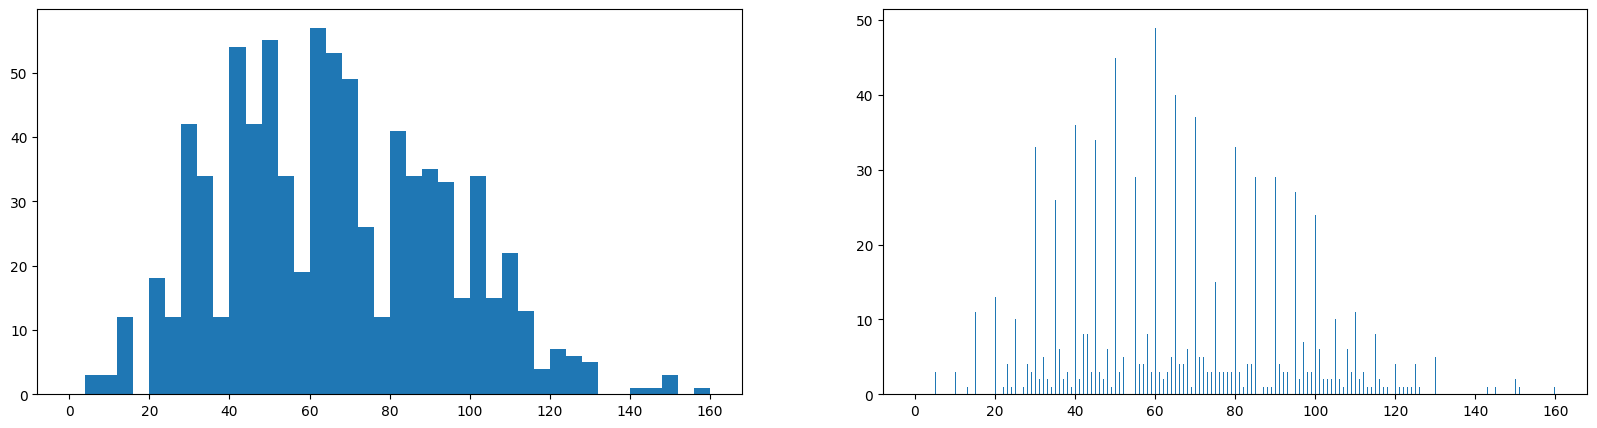

In [181]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

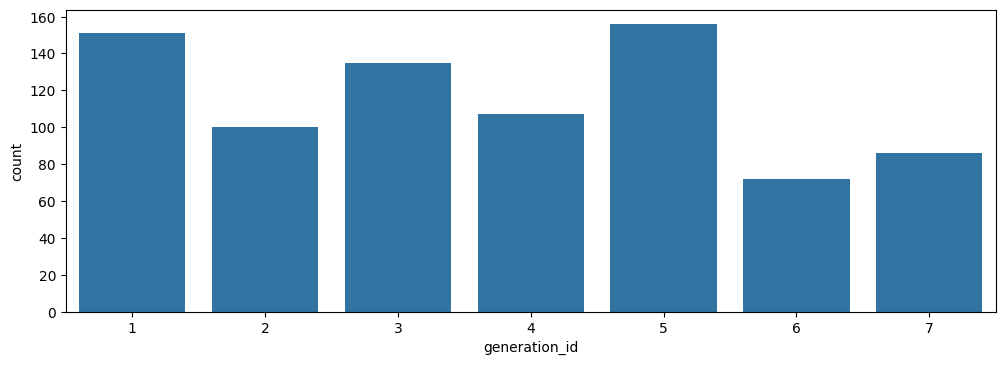

In [184]:
## Use axes with seaborn.countplot()

fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, ax = ax);

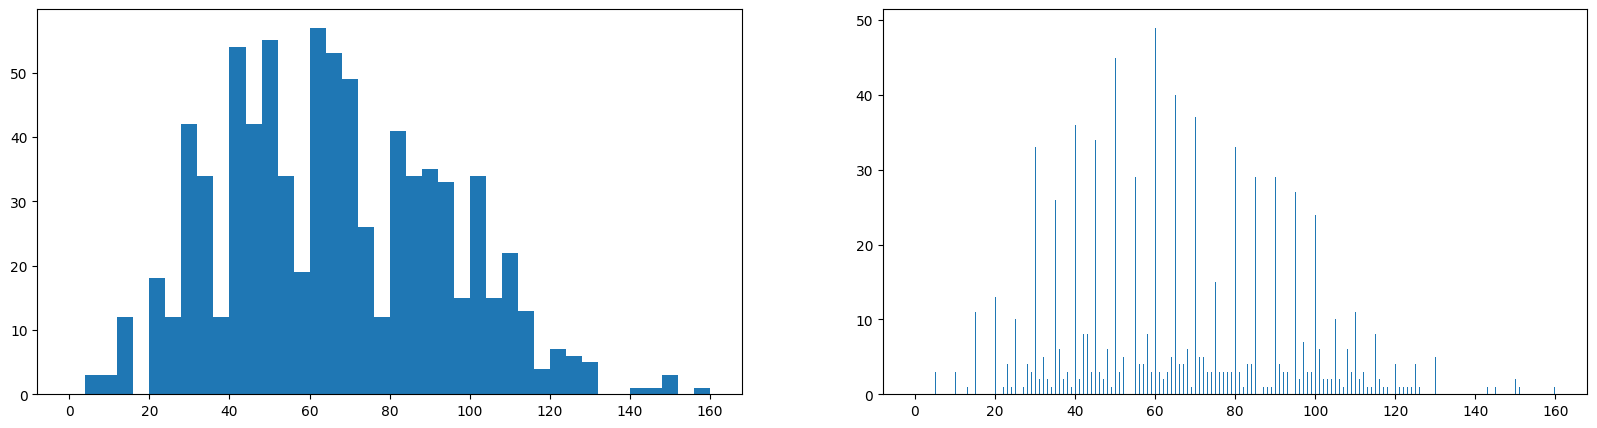

In [182]:
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

#### ___Demonstrate pyplot.sca() and pyplot.text() to generate a grid of subplots___

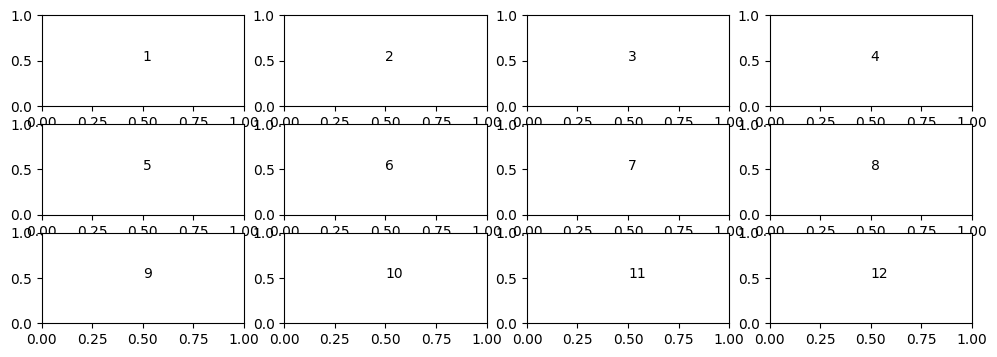

In [185]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

### ___Scales and Transformations___

##### ___Scale the x-axis to log-type, change the axis limits, and increase the x-ticks___

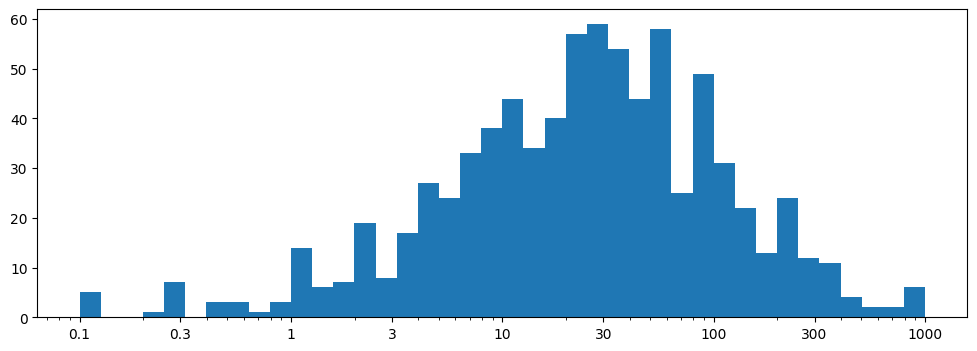

In [186]:
# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(-1, 3+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels);

#### ___Custom scaling the given data Series, instead of using the built-in log scale___

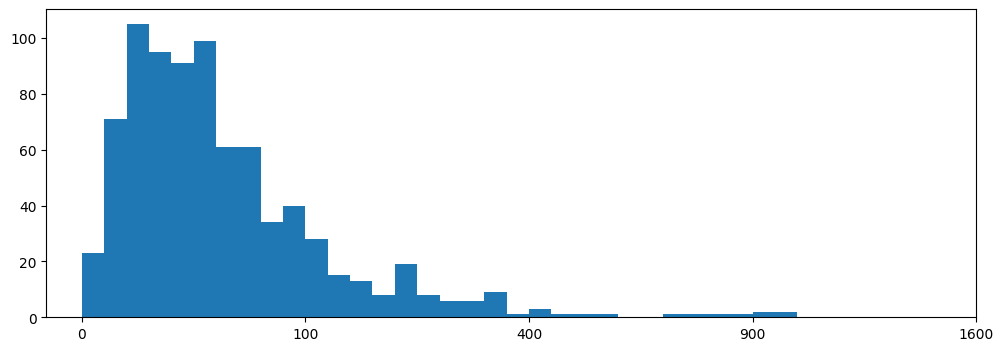

In [187]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max())+1, 1)

# Plot the scaled data
plt.hist(pokemon['weight'].apply(sqrt_trans), bins = bin_edges)

# Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(pokemon['weight'].max())+10, 10)

# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));